<a href="https://colab.research.google.com/github/sumayyamunir1/Bike-Sharing-System/blob/master/BIKE_data_Neural_nets_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [1]:
from keras.layers import Activation,Dense
from keras.activations import relu,sigmoid
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import pandas as pd #used for handling dataset
import tensorflow as tf
import warnings
from numpy import loadtxt
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from keras.callbacks import EarlyStopping
import pandas as pd #used for handling dataset

Using TensorFlow backend.


In [3]:
#get csv file and store in a variable bikedata
bikedata=pd.read_csv("/hour.csv")
#assign bikedata to dataframe
dataframe=pd.DataFrame(bikedata)
print(dataframe)

       instant      dteday  season  yr  ...  windspeed  casual  registered  cnt
0            1  2011-01-01       1   0  ...     0.0000       3          13   16
1            2  2011-01-01       1   0  ...     0.0000       8          32   40
2            3  2011-01-01       1   0  ...     0.0000       5          27   32
3            4  2011-01-01       1   0  ...     0.0000       3          10   13
4            5  2011-01-01       1   0  ...     0.0000       0           1    1
...        ...         ...     ...  ..  ...        ...     ...         ...  ...
17374    17375  2012-12-31       1   1  ...     0.1642      11         108  119
17375    17376  2012-12-31       1   1  ...     0.1642       8          81   89
17376    17377  2012-12-31       1   1  ...     0.1642       7          83   90
17377    17378  2012-12-31       1   1  ...     0.1343      13          48   61
17378    17379  2012-12-31       1   1  ...     0.1343      12          37   49

[17379 rows x 17 columns]


In [4]:
#print dataset information
print(dataframe.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


In [5]:
#dataset description
print(dataframe.describe())

          instant        season  ...    registered           cnt
count  17379.0000  17379.000000  ...  17379.000000  17379.000000
mean    8690.0000      2.501640  ...    153.786869    189.463088
std     5017.0295      1.106918  ...    151.357286    181.387599
min        1.0000      1.000000  ...      0.000000      1.000000
25%     4345.5000      2.000000  ...     34.000000     40.000000
50%     8690.0000      3.000000  ...    115.000000    142.000000
75%    13034.5000      3.000000  ...    220.000000    281.000000
max    17379.0000      4.000000  ...    886.000000    977.000000

[8 rows x 16 columns]


# **Data distribution, visualization by plots**

In [6]:
import seaborn as sns
#plot visual and size configuration
sns.set_style('whitegrid')
sns.set_context('talk')
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (30, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

plt.rcParams.update(params)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm




**how data is distributed on years for count variable**

[Text(0.5, 1.0, 'Year distribution of counts')]

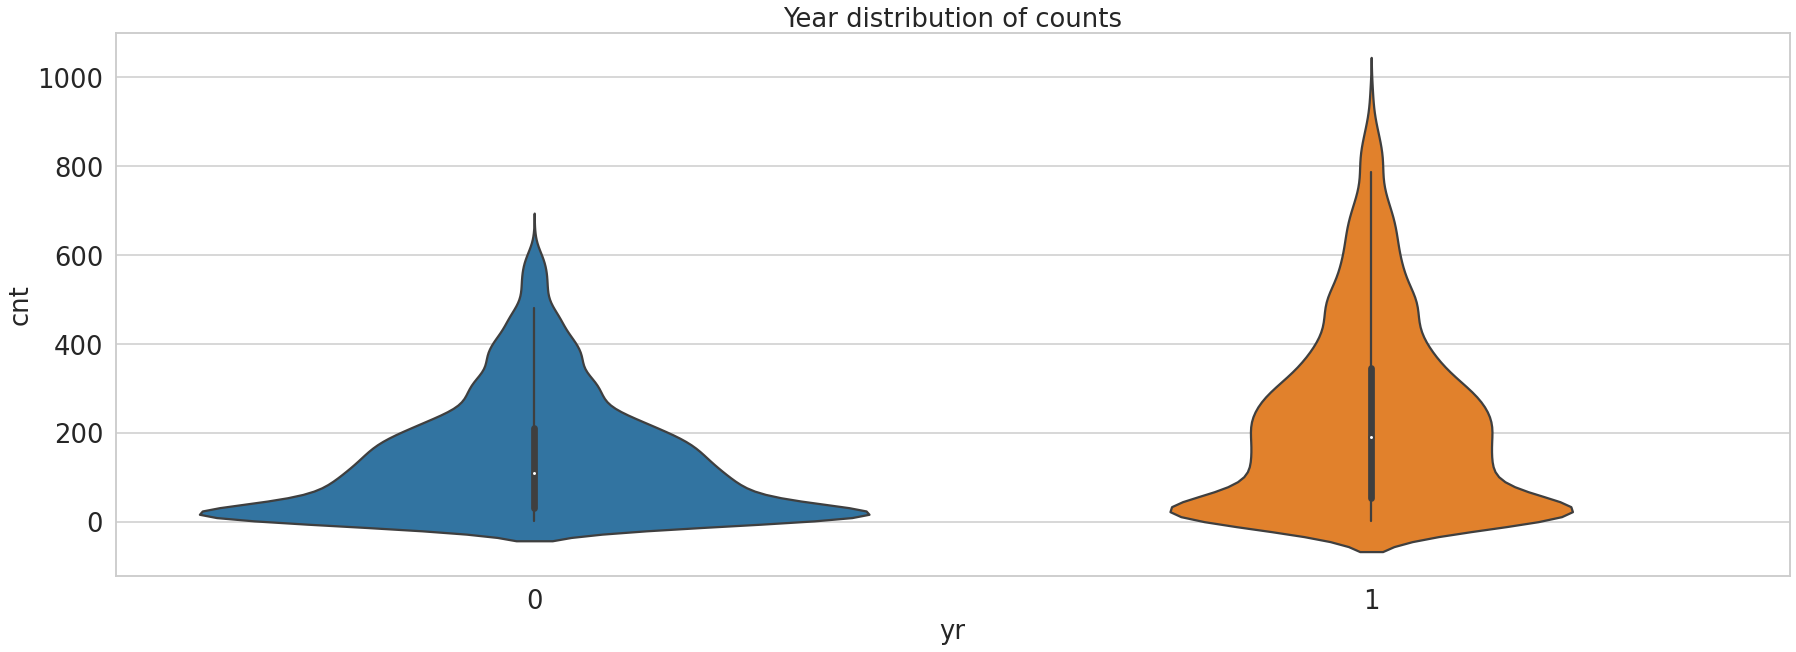

In [7]:
fig,ax = plt.subplots()
sns.violinplot(data=dataframe[['yr',
                           'cnt']],
              x='yr',
              y='cnt',
              ax=ax)
ax.set(title="Year distribution of counts")

**how data is distributed on months for count variable**

[Text(0.5, 1.0, 'Monthly distribution of counts')]

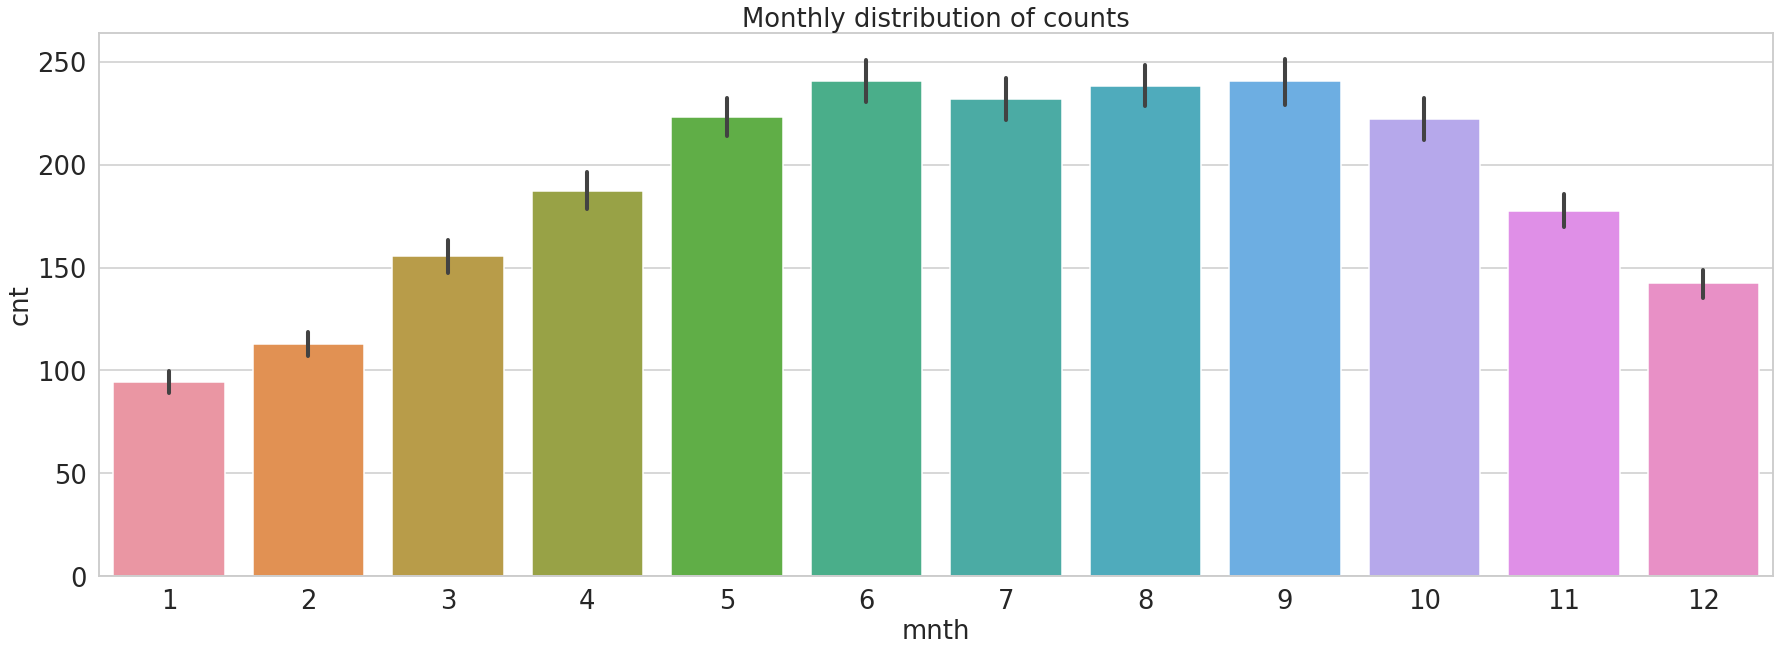

In [8]:
fig,ax = plt.subplots()
sns.barplot(data=dataframe[['mnth',
                           'cnt']],
              x='mnth',
              y='cnt',
              ax=ax)
ax.set(title="Monthly distribution of counts")

**Season distribution of count**

[Text(0.5, 1.0, 'distribution of counts on Season')]

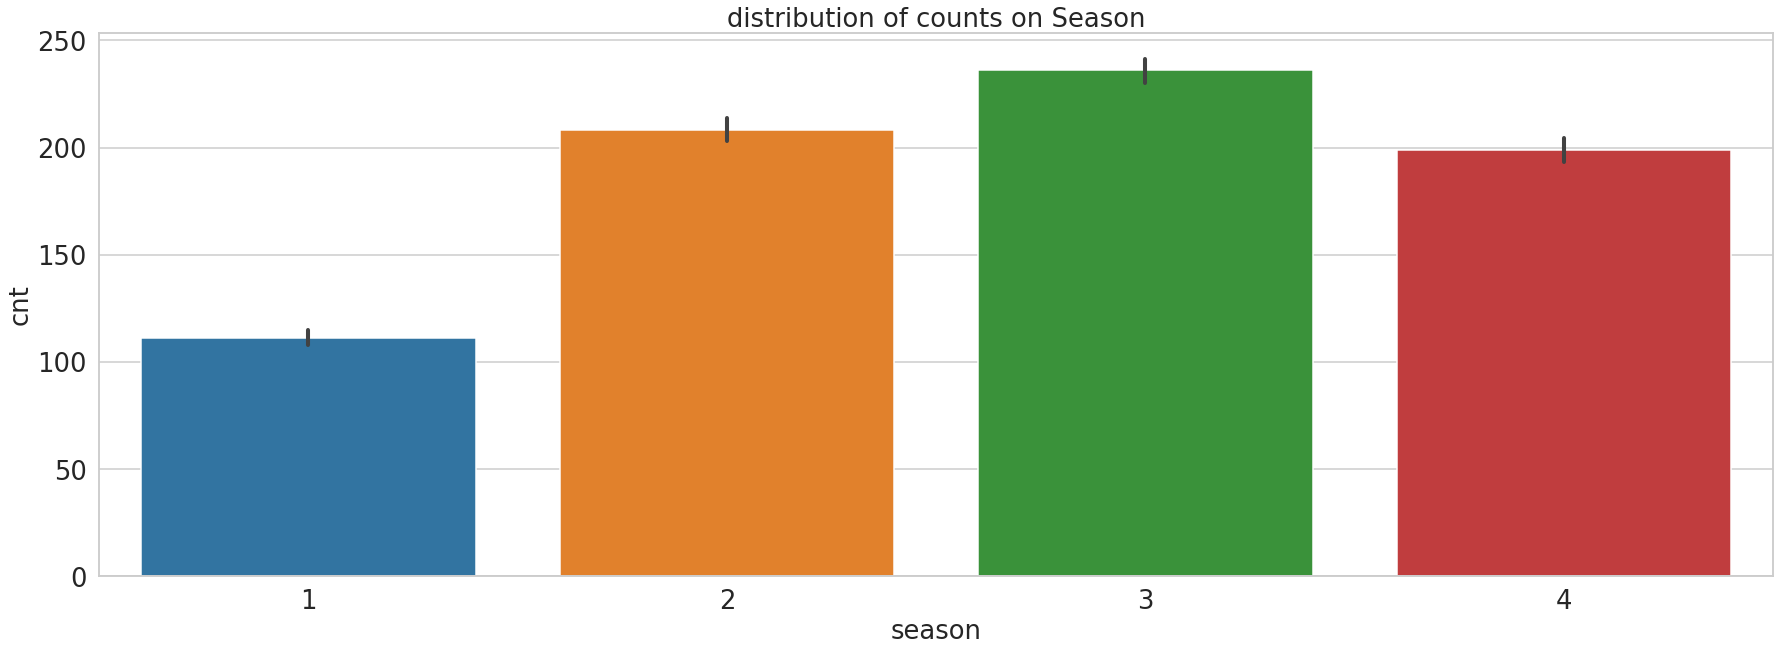

In [9]:
fig,ax = plt.subplots()
sns.barplot(data=dataframe[['season',
                           'cnt']],
              x='season',
              y='cnt',
              ax=ax)
ax.set(title="distribution of counts on Season")

# **Model Implementation Neural Networks**

**Artificial Neural Network**

In [10]:
#drop useless columns by applying PCA feature selection
preprocesseddataframe=bikedata.drop(columns=['instant','dteday'])
print(preprocesseddataframe.head(4))

#Normalizing the data by splitting the attributes into independent variables and target variable (dependent variable)
X_independent=preprocesseddataframe.iloc[:,:-1].values #all coulumns except the last 
Y_dependent=preprocesseddataframe.iloc[:,-1].values#only the last coulumn

##splitting dataset into training and test set
X_train,X_test,Y_train,Y_test=train_test_split(X_independent,Y_dependent,test_size=0.2,random_state=0)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

   season  yr  mnth  hr  holiday  ...   hum  windspeed  casual  registered  cnt
0       1   0     1   0        0  ...  0.81        0.0       3          13   16
1       1   0     1   1        0  ...  0.80        0.0       8          32   40
2       1   0     1   2        0  ...  0.80        0.0       5          27   32
3       1   0     1   3        0  ...  0.75        0.0       3          10   13

[4 rows x 15 columns]
(13903, 14) (3476, 14) (13903,) (3476,)


In [0]:
#apply MinMaxScaler to organize the data in same range for both testing and training
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train_sc = X_train
X_test_sc = X_test
X_train_sc[:,8:14]=scaler.fit_transform(X_train[:,8:14])
X_test_sc[:,8:14]=scaler.transform(X_test[:,8:14])

In [12]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU, PReLU,ELU
from keras.layers import Dropout
#model initializer
regressor=Sequential()
#Adding first hidden layer + input layer
regressor.add(Dense(units=8 , init='uniform',activation='relu', input_dim=14))

#2nd layer
regressor.add(Dense(units=8 , init='uniform',activation='relu'))

#3rd layer
regressor.add(Dense(units=1 , init='glorot_uniform',activation='linear'))



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=8, activation="relu", input_dim=14, kernel_initializer="uniform")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1, activation="linear", kernel_initializer="glorot_uniform")`
  from ipykernel import kernelapp as app


**Display Artificial Neural Network Summary**

In [13]:

# Model summary
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 120       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Model config
regressor.get_config()

{'layers': [{'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 14),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'RandomUniform',
     'config': {'maxval': 0.05, 'minval': -0.05, 'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_1',
    'trainable': True,
    'units': 8,
    'use_bias': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'RandomUniform',
     'config': {'maxval': 0.05, 'minval': -0.05, 'seed': None}},
    'kernel_regularizer': None,
    'name':

In [15]:
# weight list
regressor.get_weights()

[array([[-0.02503841,  0.01185922, -0.01620295,  0.01878312, -0.01816953,
          0.01550685,  0.03811648, -0.0197664 ],
        [ 0.01924029, -0.01102386, -0.04485927,  0.0382615 ,  0.00289144,
         -0.04567124,  0.0221728 , -0.01938166],
        [ 0.02966478, -0.04075875, -0.01925796, -0.04637725,  0.00692948,
         -0.01306241,  0.04376412,  0.01911085],
        [ 0.00393231,  0.034203  ,  0.03529641,  0.04790951,  0.00392346,
         -0.02717542, -0.02804291, -0.04310895],
        [-0.02764066,  0.02779675,  0.02543426, -0.03472593,  0.00606873,
         -0.01374247, -0.01339576,  0.01153865],
        [ 0.03204956, -0.04037673, -0.03018155, -0.01841044, -0.04777744,
         -0.02845055,  0.03088701, -0.01048328],
        [ 0.00505624,  0.04708978,  0.01438046, -0.01962782, -0.04427022,
         -0.03307183, -0.04376724, -0.00171924],
        [-0.03810717,  0.02503422, -0.00076837,  0.01672829, -0.02491763,
         -0.01510526, -0.00462709, -0.03222307],
        [-0.0299

**Model compilation and fitting to training set**

In [53]:
#compile ANN with 30 epochs
regressor.compile(optimizer='adam',loss= 'mean_squared_error',metrics=['mse','mae'])
#fitting ANN to training set
data=regressor.fit(X_train,Y_train,validation_split=0.3 , batch_size = 15 ,nb_epoch=50)



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


Train on 9732 samples, validate on 4171 samples
Epoch 1/50
9732/9732 [==============================] - 1s 91us/step - loss: 0.1464 - mse: 0.1464 - mae: 0.0828 - val_loss: 1.6705e-05 - val_mse: 1.6705e-05 - val_mae: 0.0022
Epoch 2/50
9732/9732 [==============================] - 1s 85us/step - loss: 7.2888e-05 - mse: 7.2888e-05 - mae: 0.0046 - val_loss: 1.5376e-04 - val_mse: 1.5376e-04 - val_mae: 0.0101
Epoch 3/50
9732/9732 [==============================] - 1s 83us/step - loss: 0.2653 - mse: 0.2653 - mae: 0.1685 - val_loss: 5.2808e-05 - val_mse: 5.2808e-05 - val_mae: 0.0050
Epoch 4/50
9732/9732 [==============================] - 1s 82us/step - loss: 3.2298e-05 - mse: 3.2298e-05 - mae: 0.0025 - val_loss: 1.1590e-05 - val_mse: 1.1590e-05 - val_mae: 0.0015
Epoch 5/50
9732/9732 [==============================] - 1s 81us/step - loss: 2.9055e-05 - mse: 2.9055e-05 - mae: 0.0026 - val_loss: 1.1306e-05 - val_mse: 1.1306e-05 - val_mae: 0.0019
Epoch 6/50
9732/9732 [==============================]

**Evaluating the model**

In [54]:
train_mae = regressor.evaluate(X_train, Y_train, verbose=0)
test_mae = regressor.evaluate(X_test, Y_test, verbose=0)
train_mse = regressor.evaluate(X_train, Y_train, verbose=0)
test_mse = regressor.evaluate(X_test, Y_test, verbose=0)
print("training MAE", train_mae)
print("testing MAE", test_mae)
print("training MSE", train_mse)
print("testing MSE", train_mse)


training MAE [0.8509324853354922, 0.8509321808815002, 0.8813589215278625]
testing MAE [0.8617419072344333, 0.861741840839386, 0.8850204348564148]
training MSE [0.8509324853354922, 0.8509321808815002, 0.8813589215278625]
testing MSE [0.8509324853354922, 0.8509321808815002, 0.8813589215278625]


**Training loss vs Validation loss**

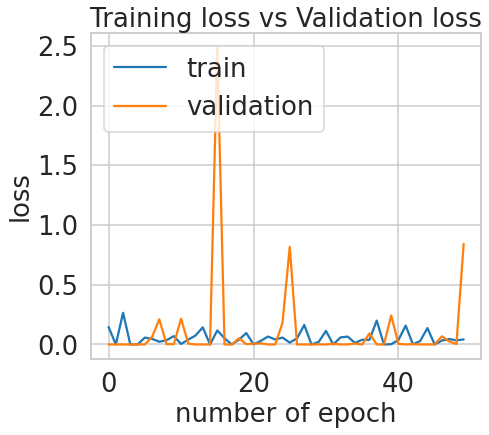

In [55]:
#list data
plt.figure(figsize=(7,6))
plt.plot(data.history['loss'])
plt.plot(data.history['val_loss'])
plt.title('Training loss vs Validation loss')
plt.ylabel('loss')
plt.xlabel('number of epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()


**Training MAE vs Validation MAE**

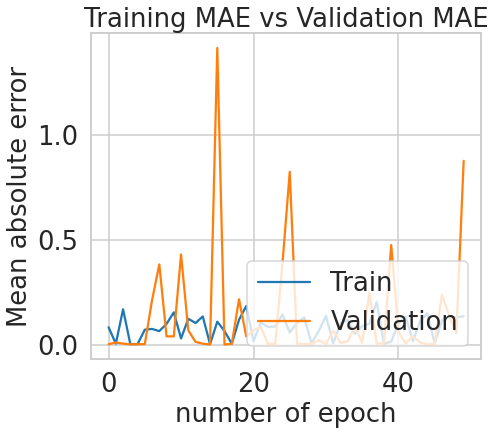

In [56]:
plt.figure(figsize=(7,6))
plt.plot(data.history['mae'])
plt.plot(data.history['val_mae'])
plt.title('Training MAE vs Validation MAE')
plt.ylabel('Mean absolute error')
plt.xlabel('number of epoch')
plt.legend(['Train','Validation'],loc='lower right')
plt.show()

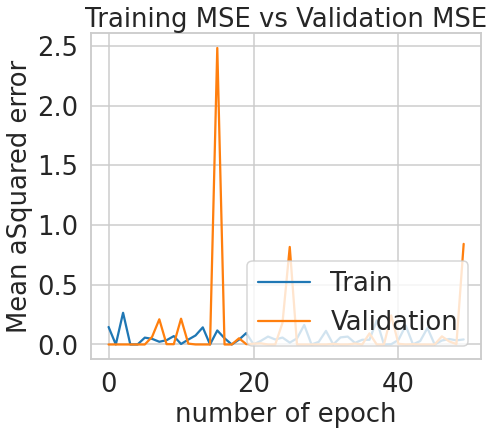

In [57]:
plt.figure(figsize=(7,6))
plt.plot(data.history['mse'])
plt.plot(data.history['val_mse'])
plt.title('Training MSE vs Validation MSE')
plt.ylabel('Mean aSquared error')
plt.xlabel('number of epoch')
plt.legend(['Train','Validation'],loc='lower right')
plt.show()

**Use Early Stopping to stop at best results during training**

In [58]:
#compile ANN with 30 epochs
regressor.compile(optimizer='adam',loss= 'mean_squared_error',metrics=['mse','mae'])
#fitting ANN to training set
data=regressor.fit(X_train,Y_train,validation_split=0.3 , batch_size = 15 ,nb_epoch=50)
monitor=EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='min', baseline=None, restore_best_weights=True)
train_mae = regressor.evaluate(X_train, Y_train, verbose=0)
test_mae = regressor.evaluate(X_test, Y_test, verbose=0)
train_mse = regressor.evaluate(X_train, Y_train, verbose=0)
test_mse = regressor.evaluate(X_test, Y_test, verbose=0)
print("training MAE", train_mae)
print("testing MAE", test_mae)
print("training MSE", train_mse)
print("testing MSE", train_mse)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


Train on 9732 samples, validate on 4171 samples
Epoch 1/50
9732/9732 [==============================] - 1s 92us/step - loss: 0.1416 - mse: 0.1416 - mae: 0.0824 - val_loss: 1.4338e-05 - val_mse: 1.4338e-05 - val_mae: 0.0023
Epoch 2/50
9732/9732 [==============================] - 1s 82us/step - loss: 2.3582e-05 - mse: 2.3582e-05 - mae: 0.0026 - val_loss: 2.1332e-04 - val_mse: 2.1332e-04 - val_mae: 0.0132
Epoch 3/50
9732/9732 [==============================] - 1s 85us/step - loss: 0.0413 - mse: 0.0413 - mae: 0.1298 - val_loss: 0.0080 - val_mse: 0.0080 - val_mae: 0.0773
Epoch 4/50
9732/9732 [==============================] - 1s 84us/step - loss: 0.0399 - mse: 0.0399 - mae: 0.0936 - val_loss: 9.8650e-06 - val_mse: 9.8650e-06 - val_mae: 0.0018
Epoch 5/50
9732/9732 [==============================] - 1s 84us/step - loss: 0.1565 - mse: 0.1565 - mae: 0.1353 - val_loss: 1.1377e-05 - val_mse: 1.1377e-05 - val_mae: 0.0012
Epoch 6/50
9732/9732 [==============================] - 1s 87us/step - loss: 

**Evaluate**

In [52]:
mae  = regressor.evaluate(X_test, Y_test)
print(mse)

3476/3476 [==============================] - 0s 22us/step
[0.02430622696113463, 0.024306228384375572, 0.12996329367160797]


In [51]:
mse  = regressor.evaluate(X_test, Y_test)
print(mse)

3476/3476 [==============================] - 0s 21us/step
[0.02430622696113463, 0.024306228384375572, 0.12996329367160797]


**Making prediction on test data**

In [59]:
#making predictions
y_pred=regressor.predict(X_test)
 #mean=mean_absolute_error(Y_test, y_pred)
print(y_pred)


[[  6.9945755]
 [  5.041966 ]
 [743.0434   ]
 ...
 [ 34.031338 ]
 [  7.0091887]
 [371.04904  ]]


**Hyper Paramater Tuning with Hyperas**

In [30]:
!pip install hyperas
!pip install hyperopt

In [0]:
from hyperopt import Trials, STATUS_OK, tpe
from hyperas import optim
from hyperas.distributions import choice, uniform

# from tensorflow.python.keras.layers import Dense, Dropout, Activation
# from tensorflow.python.keras import Sequential

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation


from keras import utils as np_utils

Gatehring data for Hyperas

In [0]:

def data():
    '''
    Data providing function:
    '''
    import numpy as np
    import pandas as pd
    from sklearn.model_selection import train_test_split
    import tensorflow as tf
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Dropout, Activation

    #get csv file and store in a variable bikedata
    bikedata=pd.read_csv("/hour.csv")
    #assign bikedata to dataframe
    dataframe=pd.DataFrame(bikedata)
    
    #### PrePROCESSING
    #drop useless columns by applying PCA feature selection
    preprocesseddataframe=bikedata.drop(columns=['instant','dteday'])
    print(preprocesseddataframe.head(4))

    #Normalizing the data by splitting the attributes into independent variables and target variable (dependent variable)
    X_independent=preprocesseddataframe.iloc[:,:-1].values #all coulumns except the last 
    Y_dependent=preprocesseddataframe.iloc[:,-1].values#only the last coulumn

    ##splitting dataset into training and test set
    X_train,X_test,Y_train,Y_test=train_test_split(X_independent,Y_dependent,test_size=0.2,random_state=0)
    
    return X_train, Y_train, X_test, Y_test

Model Building

In [35]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def model(X_train, Y_train, X_test, Y_test):
    '''
    Model providing function:
    '''
    import keras
    from keras.models import Sequential
    from keras.layers import Dense
    from keras.layers import LeakyReLU, PReLU,ELU
    from keras.layers import Dropout
    #model initializer
    regressor=Sequential()
    #Adding first hidden layer + input layer
    regressor.add(Dense(units=64 ,activation='relu', input_shape=(14,)))

    #2nd layer
    regressor.add(Dense(units=32,activation='relu'))

    #3rd layer
    regressor.add(Dense(units=1,activation='linear'))


    #compile
    regressor.compile(loss='mean_squared_error',
                  optimizer={{choice(['rmsprop', 'adam', 'sgd'])}},
                  metrics=['mse', 'mae'])
    data=regressor.fit(X_train, Y_train,
              batch_size=32,
              epochs=10,
              verbose=2,
              validation_data=(X_test, Y_test))
    
#get the lowest validation loss of the training epochs
validation_loss = data.history['val_loss']
print('Best validation loss of epoch:', validation_loss)
return {'loss': validation_loss, 'status': STATUS_OK, 'model': regressor}
   

AttributeError: ignored

TO RUN HYOERAS WE NEED TO LOAD FILE FROM DRIVE

In [0]:
# Install the PyDrive wrapper & import libraries.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Copy/download the file
fid = drive.ListFile({'q':"title='BIKE_data.ipynb'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('BIKE_data.ipynb')

Best Run

In [0]:
#BEST run
optim.minimize(model=model,
                data=data,
                max_evals=2,
                algo=tpe.suggest,
                notebook_name='BIKE_data', # This is important!
                verbose=True,
                trials=Trials()
                )

X_train, Y_train, X_test, Y_test = data()
print("Evalutation of best performing model:")
print(best_model.evaluate(X_test, Y_test))
print("Best performing model chosen hyper-parameters:")
print(best_run)

TypeError: ignored